In [35]:
from sklearn import datasets
import numpy as np

In [5]:
digits = datasets.load_digits()

In [8]:
data = digits.data
target = digits.target

In [50]:
type(data.shape[1])

int

In [17]:
from sklearn import model_selection, tree

In [28]:
tree_clf = tree.DecisionTreeClassifier(random_state=1)
cross_val_1 = model_selection.cross_val_score(estimator=tree_clf,X=data,y=target,cv=10)
ans_1 = cross_val_1.mean()
print ans_1

0.83086244395


In [29]:
from sklearn import ensemble

In [53]:
bag_clf = ensemble.BaggingClassifier(base_estimator=tree_clf,n_estimators=100)
cross_val_2 = model_selection.cross_val_score(estimator=bag_clf,X=data,y=target,cv=10)
ans_2 = cross_val_2.mean()
print ans_2

0.924384509304


In [42]:
?model_selection.cross_val_score()

In [55]:
?tree.DecisionTreeClassifier

In [56]:
?ensemble.BaggingClassifier()

In [54]:
bag_clf_feat = ensemble.BaggingClassifier(base_estimator=tree_clf,n_estimators=100, max_features=int(np.sqrt(data.shape[1])))
cross_val_3 = model_selection.cross_val_score(estimator=bag_clf_feat,X=data,y=target,cv=10)
ans_3 = cross_val_3.mean()
print ans_3

0.93426365569


In [57]:
tree_clf_rand = tree.DecisionTreeClassifier(splitter='random',random_state=1)
bag_clf_rand = ensemble.BaggingClassifier(base_estimator=tree_clf_rand,n_estimators=100, max_features=int(np.sqrt(data.shape[1])),bootstrap=False)
cross_val_4 = model_selection.cross_val_score(estimator=bag_clf_rand,X=data,y=target,cv=10)
ans_4 = cross_val_4.mean()
print ans_4

0.934513673575


In [65]:
?ensemble.RandomForestClassifier()

In [62]:
from matplotlib import pyplot as plt

In [63]:
scores = []
for i in range(5,100,5):
    rand_forest = ensemble.RandomForestClassifier(n_estimators=i)
    cvs = model_selection.cross_val_score(estimator=rand_forest,X=data,y=target,cv=10)
    scores.append(cvs.mean())

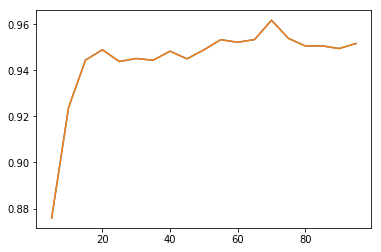

In [64]:
plt.plot(range(5,100,5),scores)
plt.show()

In [66]:
scores_feat = []
for i in range(5,60,5):
    rand_forest = ensemble.RandomForestClassifier(max_features=i)
    cvs = model_selection.cross_val_score(estimator=rand_forest,X=data,y=target,cv=10)
    scores_feat.append(cvs.mean())

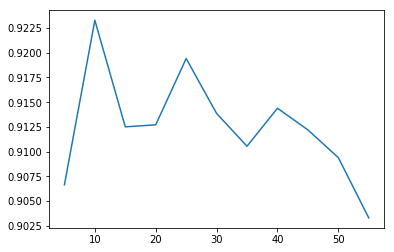

In [67]:
plt.plot(range(5,60,5),scores_feat)
plt.show()

In [68]:
scores_depth = []
for i in [3,4,5,6,8,10,15,20]:
    rand_forest = ensemble.RandomForestClassifier(max_depth=i)
    cvs = model_selection.cross_val_score(estimator=rand_forest,X=data,y=target,cv=10)
    scores_depth.append(cvs.mean())

In [72]:
def pos(array,element):
    for i in xrange(len(array)):
        if array[i] == element:
            return i

ans = [ans_1,ans_2,ans_3,ans_4]
pos(ans,ans_2)

1

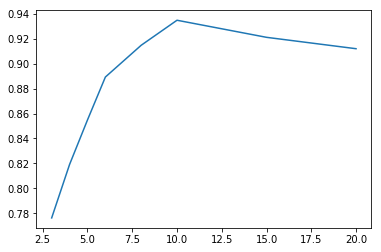

In [69]:
plt.plot([3,4,5,6,8,10,15,20],scores_depth)
plt.show()

In [74]:
ans = [ans_1,ans_2,ans_3,ans_4]
for i in ans:
    f = open(str(pos(ans,i)+1)+'.txt','w')
    f.write(str(i))
    f.close()